In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits, fetch_lfw_people
plt.style.use('seaborn-whitegrid')

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_15807/2722541365.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


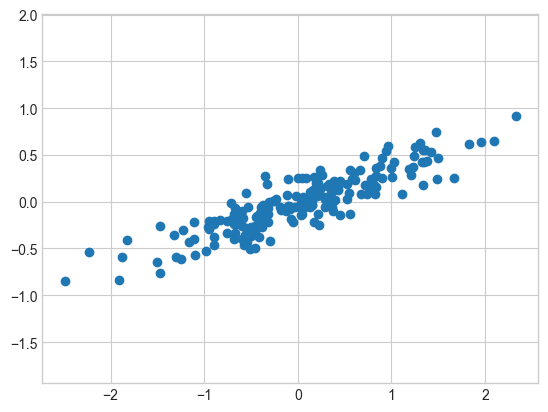

In [9]:
# up untill now we have been looking at supervised learning.
# we will look at unsupervised learning using PCA it is a dimensionality reduction technique
# it can be useful as a tool for visualization, noise filtering, feature extraction and engineering
# consider these 200 points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal")

In [10]:
# in pca this relationship is quantified by finding a list of the principal axes in the data and using those axes to describe the dataset
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [11]:
# the fit learns some quantities from the data, most importantly the "components" and "explained variance"
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [12]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


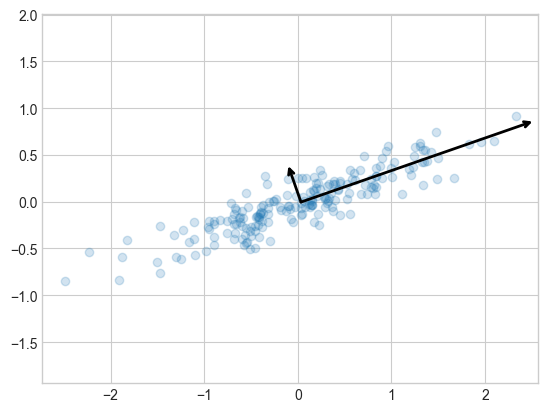

In [14]:
# to see what these numbers mean, lets visualize them as vectors over the input data using the components to define the direction of the vecor and the explained variance to define the squared-length of the vector
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle="->", linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)


# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal")
# these vectors represent the principal axes of the data, and the length of each vector is an indication of how "important" that axis is in describing the distribution of the data more precisely, it is a measure of the variance of the data when projected onto that axis

PCA as Dimensionality Reduction

In [15]:
# using pca for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance
# herer is an example of using pca as a dimensionality reduction transform
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


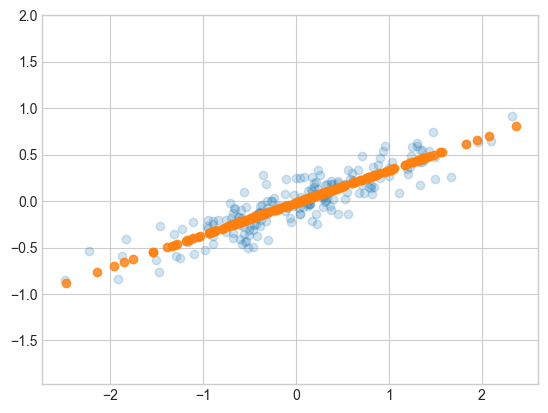

In [16]:
# the transformed data has been reduced to a single dimension. to understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis("equal")

PCA for Visualization: Hand-written digits

In [17]:
# the usefulness of dimensionality reduction may not be entirely apparent in only two dimensions, but it becomes clear when looking at high-dimensional data. here is the application of pca to the digits dataset
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
# recall that the data consists of 8x8 pixel images, meaning that they are 64-dimensional. to gain some intuition into the relationships between these points, we can use pca to project them to a more manageable number of dimensions, say two
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_15807/2607569452.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))


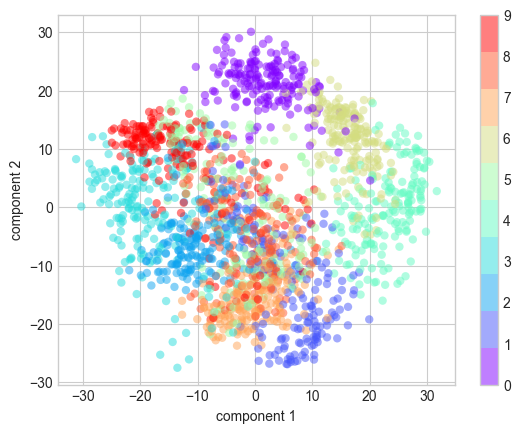

In [22]:
# we can now plot the first two principal components of each point to tlearn about the data as seen in the following figure
plt.scatter(
    projected[:, 0],
    projected[:, 1],
    c=digits.target,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("rainbow", 10),
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()
# recall what these mean these points are the projection of each data point along the directions with the largest variance. essentially we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner that is, without reference to the labels

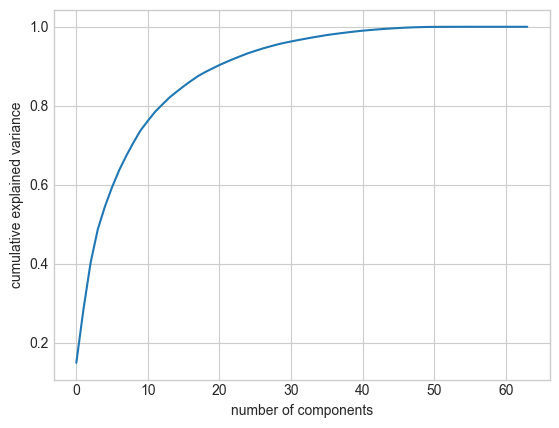

In [23]:
# what do the components mean
# each image is a vector to construct the image we multiply each element of the vector by the pixel it represents and then sum the results to build the image array
# one way we may imagine reducing the dimensionality of this data is to zero out all but a few of these basis vectors. for example if we use only the first eight components, we get an image that contains only the information that is most relevant to the original image
# PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
# choosing the number of components
# a vital part of using pca in practice is the ability to estimate how many components are needed to describe the data. we can determine this by looking at the cumulative explained variance ratio as a function of the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
# the curve quantifies how much of the total 64-dimensional valriance is contained within the first N components. for example we see that with the digits data the first 10 componenets contain approximately 75% of the variace while you need 50 to describe close to 100% this tells us that our 2d projection loses alot of information as measured by the explained variance and that we'd need about 20 components to retain 90% of the variance. looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations

PCA for Noise Filtering

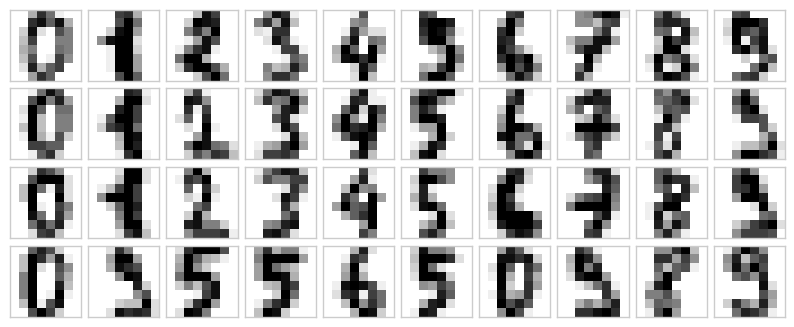

In [28]:
# PCA can also be used as a filtering approach for noisy data. the ideas is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. so if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise
# first we will plot several of the input noise-free data
def plot_digits(data):
    fig, axes = plt.subplots(
        4,
        10,
        figsize=(10, 4),
        subplot_kw={"xticks": [], "yticks": []},
        gridspec_kw=dict(hspace=0.1, wspace=0.1),
    )
    for i, ax in enumerate(axes.flat):
        ax.imshow(
            data[i].reshape(8, 8), cmap="binary", interpolation="nearest", clim=(0, 16)
        )


plot_digits(digits.data)

In [29]:
# we can add some random noise to create a noisy dataset and replot it
rng = np.random.default_rng(42)
rng.normal(10, 2)

10.609434159508863

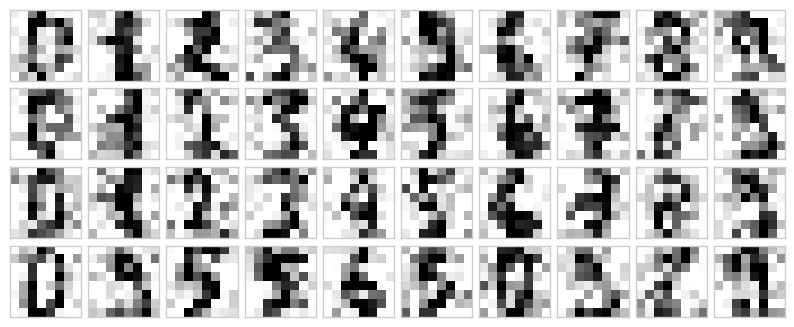

In [30]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

In [32]:
# lets train a PCA model on the noisy data, requesting that the projection preserve 50% of the variance
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

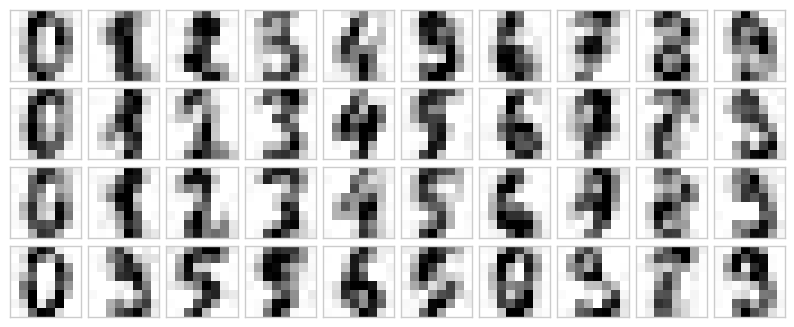

In [33]:
# now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Eigenfaces with PCA

In [34]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


In [35]:
# we can take a look at the principal axes that span this dataset. becuase this is a large dataset we will use the randoom eigensolver in the PCA estimator. it uses a randomized method to approximate the first N principal componenets more quickly than the standard solver, at the expense of some accuracy. this trade-off can be useful for high-dimensional data we will take a look at the first 150 components
pca = PCA(150, svd_solver="randomized", random_state=42)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

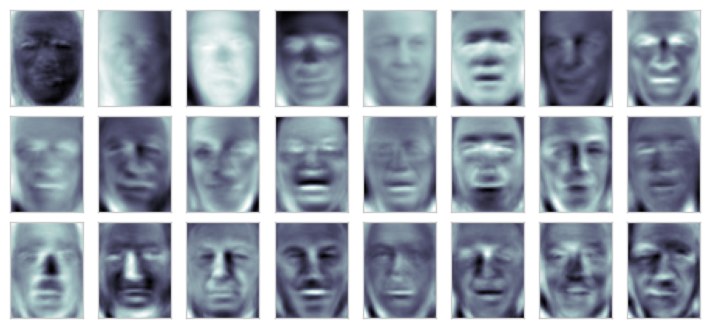

In [36]:
# in this case, it can be interesting to visualize the images associated with the first several principal components(these components are technically known as eigenvectors, so these types of images are often called eigenfaces).
fig, axes = plt.subplots(
    3,
    8,
    figsize=(9, 4),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
)
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap="bone")

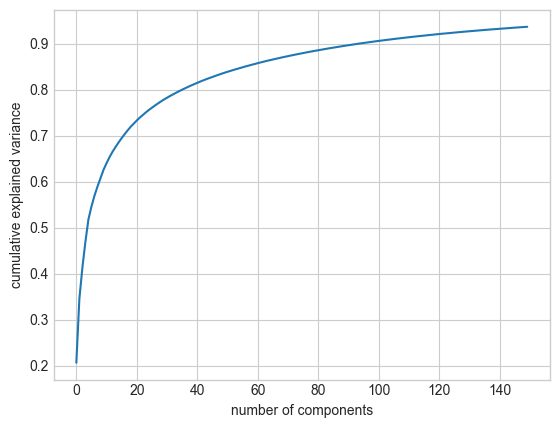

In [37]:
# the results are very interesting and give us insight into how the images vary. for example the first few eigenfaces shown here seem to be associated with the angle of lighting on the face. and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. lets take a look at a plot of the cumulative variance of these components to see how much of the data information the projection is preserving
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [38]:
# the 150 components we have chosen account for just over 90% of the variance. that would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. to make this more concrete, we can compare the input images with the images reconstructed from these 150 components
# compute the components and projected faces
pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

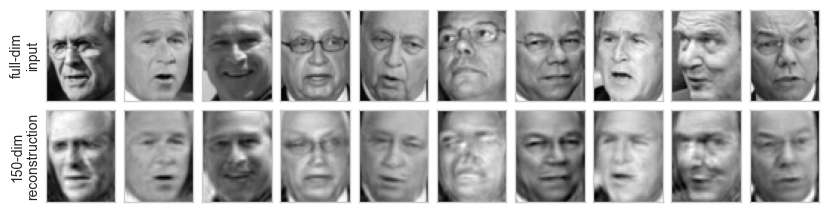

In [39]:
# plot the results
fig, ax = plt.subplots(
    2,
    10,
    figsize=(10, 2.5),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
)
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap="binary_r")
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap="binary_r")
ax[0, 0].set_ylabel("full-dim\ninput")
ax[1, 0].set_ylabel("150-dim\nreconstruction")

In [ ]:
# PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, several robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn includes a number of interesting variants on PCA in the sklearn.decomposition submodule; one example is SparsePCA, which introduces a regularization term (see In Depth: Linear Regression) that serves to enforce sparsity of the components.